In [53]:
from sklearn import datasets
import pandas as pd

data = pd.read_csv('dataset.csv',index_col = 0,encoding = 'utf-8')
#labels = pd.DataFrame(data.target)
#labels.columns=['유동인구']

data.columns=['20~30대 인구수','총인구','유동인구','정류장수','정류장인원수']
data = pd.concat([data],axis=1)

data.head()

,20~30대 인구수,총인구,유동인구,정류장수,정류장인원수
행정동,,,,,
건국동,6405,22605,358766,0,0
계림동,4904,18182,158006,0,0
광천동,2153,8639,196750,3,119664
금호동,12332,49692,170268,1,18878
농성동,4725,16196,213296,0,0


In [57]:
feature = data[ ['20~30대 인구수','유동인구']]

In [58]:
feature.head()


,20~30대 인구수,유동인구
행정동,,
건국동,6405,358766
계림동,4904,158006
광천동,2153,196750
금호동,12332,170268
농성동,4725,213296


In [21]:
#feature = feature.reset_index()


In [59]:
index_list = feature.index
index_list


Index(['건국동', '계림동', '광천동', '금호동', '농성동', '대촌동', '도산동', '동곡동', '동림동', '동명동',
       '동천동', '두암동', '매곡동', '문화동', '문흥동', '방림동', '백운동', '본량동', '봉선동', '비아동',
       '사직동', '산수동', '삼각동', '삼도동', '상무동', '서남동', '서창동', '석곡동', '송암동', '송정동',
       '수완동', '신가동', '신안동', '신용동', '신창동', '신흥동', '양동', '양림동', '양산동', '어령동',
       '오치동', '용봉동', '우산동(광산구)', '우산동(북구)', '운남동', '운암동', '월곡동', '월산동', '유덕동',
       '일곡동', '임곡동', '임동', '주월동', '중앙동', '중흥동', '지산동', '지원동', '첨단동', '충장동',
       '치평동', '평동', '풍암동', '풍향동', '하남동', '학동', '학운동', '화정동', '효덕동'],
      dtype='object', name='행정동')

In [60]:
predict.index = index_list
predict

,predict
행정동,
건국동,-1
계림동,-1
광천동,-1
금호동,-1
농성동,-1
...,...
하남동,-1
학동,-1
학운동,-1


In [61]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns


# create model and prediction
model = DBSCAN(eps=0.5,min_samples=5)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']
predict.index = index_list
predict





,predict
행정동,
건국동,-1
계림동,-1
광천동,-1
금호동,-1
농성동,-1
...,...
하남동,-1
학동,-1
학운동,-1


In [62]:
plt.rcParams['font.family'] = 'Malgun Gothic' #한글 출력 위해 글꼴 설정하기|

In [63]:
# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

In [64]:
print(r)

     20~30대 인구수    유동인구  predict
행정동                             
건국동        6405  358766       -1
계림동        4904  158006       -1
광천동        2153  196750       -1
금호동       12332  170268       -1
농성동        4725  213296       -1
..          ...     ...      ...
하남동        6538  776453       -1
학동         2314  247710       -1
학운동        2503   41664       -1
화정동       17487  416288       -1
효덕동       11856  119038       -1

[68 rows x 3 columns]


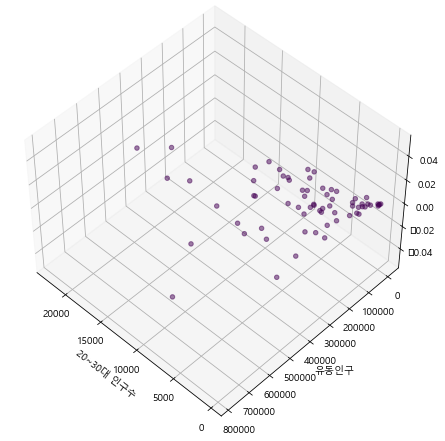

In [66]:

from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['20~30대 인구수'],r['유동인구'],c=r['predict'],alpha=0.5)
ax.set_xlabel('20~30대 인구수')

ax.set_ylabel('유동인구')
plt.show()



#출처: https://bcho.tistory.com/1205 [조대협의 블로그]

In [ ]:
ct = pd.crosstab(data['labels'],r['predict'])
print (ct)



#출처: https://bcho.tistory.com/1205 [조대협의 블로그]